<a href="https://colab.research.google.com/github/hussain0048/Water-borne-diseases/blob/main/Watern_Brone_Disease_3_23_21_(Typod)with_COrr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Introduction**
 the water-borne diseases are the most common which transmitted in contaminated fresh water, whether in bathing, washing, drinking, or in the preparation of food.. More than one-third of Earth&#39;s accessible renewable freshwater is consumptively used for agricultural, industrial, and
domestic purposes. Water-borne diseases are commonly found throughout the world but the
condition is more aggravated in developing countries including Pakistan. 

#**2-Importing libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd 


#**3-Processing**


## **3.1 Data Reading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Typhoid_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310187e+12,NaN,33 Year(s),Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:16 A10P10,1000000000086677,Y,1000000000084517,K04MIC17123950,NEGATIVE
1,2,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310187e+12,NaN,33 Year(s),Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:13 A10P10,1000000000084517,Y,1000000000084517,K04MIC17123950,NEGATIVE
2,3,K04MIC18011045,K0460000001388,Aurangzeb,NADIR KHAN,NaN,1.310163e+12,NaN,52 Year(s),Male,0,Mansehra,Mansehra,1/23/2018 11:15:40 A1P1,1000000000084517,Y,1000000000084517,K04MIC18011045,NEGATIVE
3,4,K04MIC17048512,K0460000001390,Muhammad Raza,MUHAMMAD RAFIQUE,NaN,1.310169e+12,NaN,31 Year(s),Male,0,Abbottabad,Abbottabad,5/2/2017 9:20:21 A5P5,1000000000084517,Y,1000000000084517,K04MIC17048512,POSITIVE
4,5,K04MIC19121433,K0460000001408,Muhammad Shafiq,ALI ZAMAN,NaN,1.310164e+12,NaN,36 Year(s),Male,0,Abbottabad,Abbottabad,8/21/2019 15:51:51 A8P8,1000000000086677,Y,1000000000084517,K04MIC19121433,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68619,68620,K04MIC21013679,K0400002460067,Ayesha Rizwan,MUHAMMAD RIZWAN,NaN,NaN,NaN,2 Year(s),Female,0,Abbottabad,Abbottabad,2/11/2021 18:54:41 A2P2,1000000000084517,Y,1000000000084517,K04MIC21013679,NEGATIVE
68620,68621,K04MIC21013847,K0400002460763,M Shokat,KHALIL UR REHMAN,NaN,NaN,NaN,18 Year(s),Male,0,Abbottabad,Abbottabad,2/12/2021 11:22:43 A2P2,1000000000086286,Y,1000000000084517,K04MIC21013847,NEGATIVE
68621,68622,K04MIC21014199,K0400002461421,Mr Ayan,FARHAD KHAN,NaN,NaN,NaN,3 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:04:17 A2P2,1000000000084517,Y,1000000000084517,K04MIC21014199,NEGATIVE
68622,68623,K04MIC21014379,K04ACE21027099,Qasim Shah,JAMREEZ SHAH,NaN,NaN,NaN,48 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 17:52:31 A2P2,1000000000084517,Y,1000000000084517,K04MIC21014379,NEGATIVE


## 3.2- **Drop Index Colum**

In [ ]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

In [ ]:
Train_data

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310187e+12,NaN,33 Year(s),Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:16 A10P10,1000000000086677,Y,1000000000084517,K04MIC17123950,NEGATIVE
1,2,K04MIC17123950,K0460000001366,Sonia Khan,MUHAMMAD AKBAR KHAN,NaN,1.310187e+12,NaN,33 Year(s),Female,0,Abbottabad,Abbottabad,10/7/2017 10:05:13 A10P10,1000000000084517,Y,1000000000084517,K04MIC17123950,NEGATIVE
2,3,K04MIC18011045,K0460000001388,Aurangzeb,NADIR KHAN,NaN,1.310163e+12,NaN,52 Year(s),Male,0,Mansehra,Mansehra,1/23/2018 11:15:40 A1P1,1000000000084517,Y,1000000000084517,K04MIC18011045,NEGATIVE
3,4,K04MIC17048512,K0460000001390,Muhammad Raza,MUHAMMAD RAFIQUE,NaN,1.310169e+12,NaN,31 Year(s),Male,0,Abbottabad,Abbottabad,5/2/2017 9:20:21 A5P5,1000000000084517,Y,1000000000084517,K04MIC17048512,POSITIVE
4,5,K04MIC19121433,K0460000001408,Muhammad Shafiq,ALI ZAMAN,NaN,1.310164e+12,NaN,36 Year(s),Male,0,Abbottabad,Abbottabad,8/21/2019 15:51:51 A8P8,1000000000086677,Y,1000000000084517,K04MIC19121433,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68619,68620,K04MIC21013679,K0400002460067,Ayesha Rizwan,MUHAMMAD RIZWAN,NaN,NaN,NaN,2 Year(s),Female,0,Abbottabad,Abbottabad,2/11/2021 18:54:41 A2P2,1000000000084517,Y,1000000000084517,K04MIC21013679,NEGATIVE
68620,68621,K04MIC21013847,K0400002460763,M Shokat,KHALIL UR REHMAN,NaN,NaN,NaN,18 Year(s),Male,0,Abbottabad,Abbottabad,2/12/2021 11:22:43 A2P2,1000000000086286,Y,1000000000084517,K04MIC21013847,NEGATIVE
68621,68622,K04MIC21014199,K0400002461421,Mr Ayan,FARHAD KHAN,NaN,NaN,NaN,3 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:04:17 A2P2,1000000000084517,Y,1000000000084517,K04MIC21014199,NEGATIVE
68622,68623,K04MIC21014379,K04ACE21027099,Qasim Shah,JAMREEZ SHAH,NaN,NaN,NaN,48 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 17:52:31 A2P2,1000000000084517,Y,1000000000084517,K04MIC21014379,NEGATIVE


In [ ]:
Train_data.drop(labels=['Unnamed: 0','SECTION_NO', 'PATIENT_NAME', 'FATHER_NAME',
       'HUSBAND_NAME', 'NIC_NEW', 'REFERRED_FROM', 'NO_OF_ADMISSION', 'TEHSIL', 'DISTRICT', 'CPT_ID',
       'RESULT_VALUE', 'CPT_ID.1', 'SECTION_NO.1'],axis=1,inplace=True)

##**3.3- Drop input features**

In [ ]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

In [ ]:
Train_data

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,K0460000001366,33 Year(s),Female,10/7/2017 10:05:16 A10P10,NEGATIVE
1,K0460000001366,33 Year(s),Female,10/7/2017 10:05:13 A10P10,NEGATIVE
2,K0460000001388,52 Year(s),Male,1/23/2018 11:15:40 A1P1,NEGATIVE
3,K0460000001390,31 Year(s),Male,5/2/2017 9:20:21 A5P5,POSITIVE
4,K0460000001408,36 Year(s),Male,8/21/2019 15:51:51 A8P8,NEGATIVE
...,...,...,...,...,...
68619,K0400002460067,2 Year(s),Female,2/11/2021 18:54:41 A2P2,NEGATIVE
68620,K0400002460763,18 Year(s),Male,2/12/2021 11:22:43 A2P2,NEGATIVE
68621,K0400002461421,3 Year(s),Male,2/13/2021 11:04:17 A2P2,NEGATIVE
68622,K04ACE21027099,48 Year(s),Male,2/13/2021 17:52:31 A2P2,NEGATIVE


In [ ]:
Train_data.columns

Index(['MRNO', 'AGE', 'GENDER', 'REPORT_VERIFIED', 'RESULT_TEXT'], dtype='object')

##**3.4 Convert target variable into binary Form**

In [ ]:
Train_data['RESULT_TEXT'].replace({'NEGATIVE': 0, 'POSITIVE': 1},inplace = True)


In [ ]:
Train_data

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,K0460000001366,33 Year(s),Female,10/7/2017 10:05:16 A10P10,0
1,K0460000001366,33 Year(s),Female,10/7/2017 10:05:13 A10P10,0
2,K0460000001388,52 Year(s),Male,1/23/2018 11:15:40 A1P1,0
3,K0460000001390,31 Year(s),Male,5/2/2017 9:20:21 A5P5,1
4,K0460000001408,36 Year(s),Male,8/21/2019 15:51:51 A8P8,0
...,...,...,...,...,...
68619,K0400002460067,2 Year(s),Female,2/11/2021 18:54:41 A2P2,0
68620,K0400002460763,18 Year(s),Male,2/12/2021 11:22:43 A2P2,0
68621,K0400002461421,3 Year(s),Male,2/13/2021 11:04:17 A2P2,0
68622,K04ACE21027099,48 Year(s),Male,2/13/2021 17:52:31 A2P2,0


##**3.5 Imbalance problem**

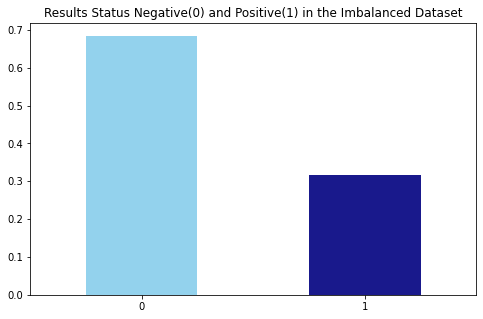

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

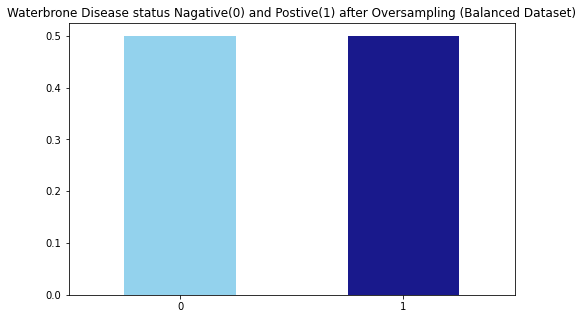

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()






In [ ]:
oversampled 

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,K0460000001366,33 Year(s),Female,10/7/2017 10:05:16 A10P10,0
1,K0460000001366,33 Year(s),Female,10/7/2017 10:05:13 A10P10,0
2,K0460000001388,52 Year(s),Male,1/23/2018 11:15:40 A1P1,0
4,K0460000001408,36 Year(s),Male,8/21/2019 15:51:51 A8P8,0
5,K0460000001558,27 Year(s),Female,10/10/2020 12:24:18 A10P10,0
...,...,...,...,...,...
62602,K0400000704505,66 Year(s),Male,9/22/2017 16:45:35 A9P9,1
51667,K0400000080346,16 Year(s),Male,1/25/2017 17:45:16 A1P1,1
4227,K0400001172648,24 Year(s),Female,4/17/2018 17:20:51 A4P4,1
28212,K0400000697678,39 Year(s),Male,9/20/2017 10:57:03 A9P9,1


##**3.6 Check Missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,1287,0.013714
MRNO,0,0.000000
AGE,0,0.000000
GENDER,0,0.000000


In [ ]:
# Filling Values with mean
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
oversampled = mean_values.fit_transform(oversampled)

ValueError: ignored

##**3.7 Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns

Index(['MRNO', 'AGE', 'GENDER', 'REPORT_VERIFIED'], dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
#oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
#oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
#oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
oversampled

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,K0460000001366,33 Year(s),Female,10/7/2017 10:05:16 A10P10,0
1,K0460000001366,33 Year(s),Female,10/7/2017 10:05:13 A10P10,0
2,K0460000001388,52 Year(s),Male,1/23/2018 11:15:40 A1P1,0
4,K0460000001408,36 Year(s),Male,8/21/2019 15:51:51 A8P8,0
5,K0460000001558,27 Year(s),Female,10/10/2020 12:24:18 A10P10,0
...,...,...,...,...,...
62602,K0400000704505,66 Year(s),Male,9/22/2017 16:45:35 A9P9,1
51667,K0400000080346,16 Year(s),Male,1/25/2017 17:45:16 A1P1,1
4227,K0400001172648,24 Year(s),Female,4/17/2018 17:20:51 A4P4,1
28212,K0400000697678,39 Year(s),Male,9/20/2017 10:57:03 A9P9,1


In [ ]:
oversampled

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
oversampled

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
MiceImputed = mean_values.fit_transform(MiceImputed)

##**3.8 Outlier detection**

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MRNO               15644.00
AGE                   29.00
GENDER                 1.00
REPORT_VERIFIED    26006.75
RESULT_TEXT            1.00
dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(91299, 5)

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,27543.0,42.0,0.0,7158.0,0.0
1,27543.0,42.0,0.0,7157.0,0.0
2,27544.0,67.0,1.0,1247.0,0.0
4,27548.0,47.0,1.0,40445.0,0.0
5,27560.0,33.0,0.0,3077.0,0.0
...,...,...,...,...,...
62602,8467.0,84.0,1.0,47486.0,1.0
51667,403.0,14.0,1.0,1400.0,1.0
4227,14730.0,30.0,0.0,22246.0,1.0
28212,8324.0,51.0,1.0,46942.0,1.0


##**3.9 Corelation Detection**

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

AttributeError: ignored

In [ ]:
MiceImputed

##**3.10 Feature Scaling**

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

AttributeError: ignored

In [ ]:
modified_data

,MRNO,AGE,GENDER,REPORT_VERIFIED,RESULT_TEXT
0,0.854683,0.350000,0.0,0.138810,0.0
1,0.854683,0.350000,0.0,0.138790,0.0
2,0.854714,0.558333,0.5,0.024182,0.0
4,0.854838,0.391667,0.5,0.784319,0.0
5,0.855210,0.275000,0.0,0.059670,0.0
...,...,...,...,...,...
62602,0.262738,0.700000,0.5,0.920860,1.0
51667,0.012505,0.116667,0.5,0.027149,1.0
4227,0.457084,0.250000,0.0,0.431400,1.0
28212,0.258301,0.425000,0.5,0.910311,1.0


In [ ]:
# Filling Values with mean
from sklearn.impute import SimpleImputer
mean_values = SimpleImputer(strategy='mean')
modified_data = mean_values.fit_transform(modified_data)

#**4 Data spliting**

In [ ]:
X=modified_data.drop('RESULT_TEXT',axis=1)

In [ ]:
y=modified_data[['RESULT_TEXT']]

In [ ]:
# y
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **Feature Selection**

In [ ]:
!pip install boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [ ]:
forest = RandomForestRegressor(n_jobs=-1,max_depth=5)

In [ ]:

boruta= BorutaPy(estimator= forest, n_estimators='auto',max_iter=100)
boruta.fit(np.array(X),np.array(y) )


In [ ]:
green_area= X.columns[boruta.support_].to_list()
blue_area= X.columns[boruta.support_weak_].to_list()

In [ ]:
print('Feature in green ara:',green_area)
print('Feature in blue ara:',blue_area)

Feature in green ara: ['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED', 'CPT_ID']
Feature in blue ara: []


# **5- Model Training**

##**5.1-Decision Trees**

In [ ]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.5982


### **5.1.1 -Confusion Matrix**



confusion matrix


[[8476 5688]
 [5623 8367]]




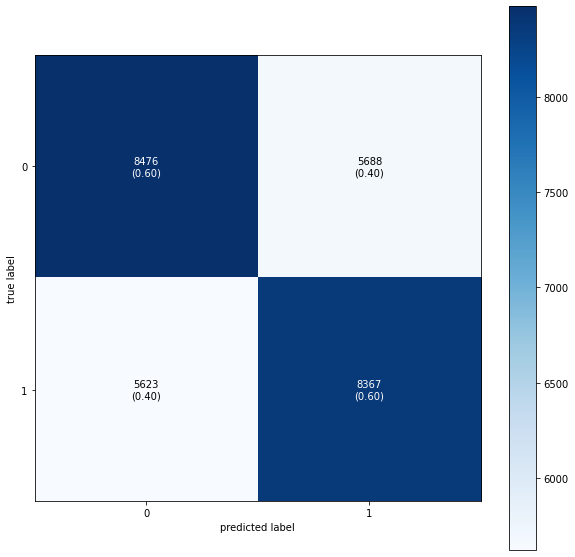

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.1.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60     14164
         1.0       0.60      0.60      0.60     13990

    accuracy                           0.60     28154
   macro avg       0.60      0.60      0.60     28154
weighted avg       0.60      0.60      0.60     28154





### **5.1.3-ROC CURVE**

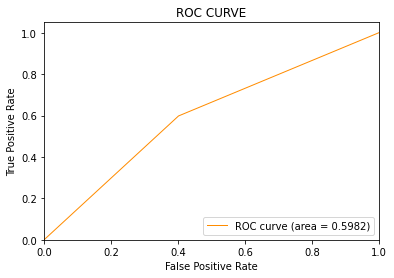

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.2-Random Forest**

In [ ]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

In [ ]:
y_pred1 = Ran_For.predict(X_test)
rn=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.6010


### **5.2.1-Confusion Matrix**



confusion matrix


[[8221 5943]
 [5290 8700]]




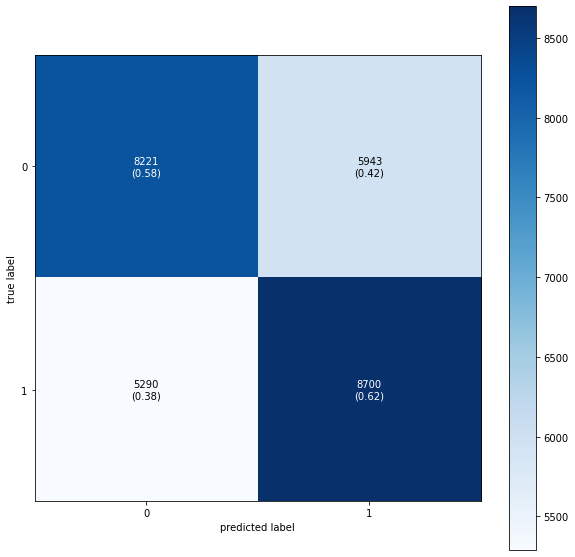

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.2.2  Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.61      0.58      0.59     14164
         1.0       0.59      0.62      0.61     13990

    accuracy                           0.60     28154
   macro avg       0.60      0.60      0.60     28154
weighted avg       0.60      0.60      0.60     28154





### **5.2.3 ROC CURVE**

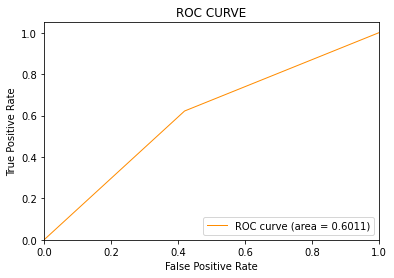

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.3 SVM Support Vector Machine**

In [ ]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(random_state=0, tol=1e-05)

In [ ]:
y_pred1 = svc.predict(X_test)
sv=svc.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.5957


### **5.3.1- Confusion Matrix**



confusion matrix


[[7952 6212]
 [5172 8818]]




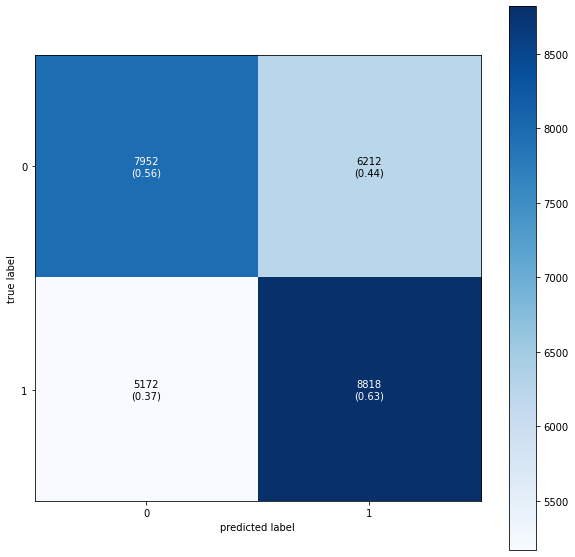

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.3.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58     14164
         1.0       0.59      0.63      0.61     13990

    accuracy                           0.60     28154
   macro avg       0.60      0.60      0.60     28154
weighted avg       0.60      0.60      0.60     28154





### **5.3.3-ROC CURVE**

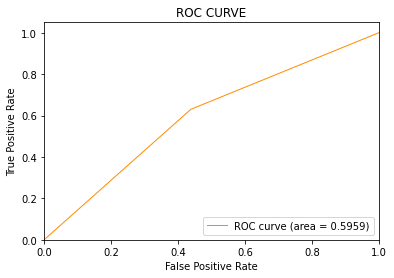

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.4-Logistic Regression**

In [ ]:
LR= LogisticRegression()
LR= LR.fit(X_train , y_train)
LR

LogisticRegression()

In [ ]:
y_pred1 = LR.predict(X_test)
lr=LR.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR.score(X_test, y_test)))

Accuracy score= 0.5956


### **5.4.1-Confusion Matrix**



confusion matrix


[[7960 6204]
 [5181 8809]]




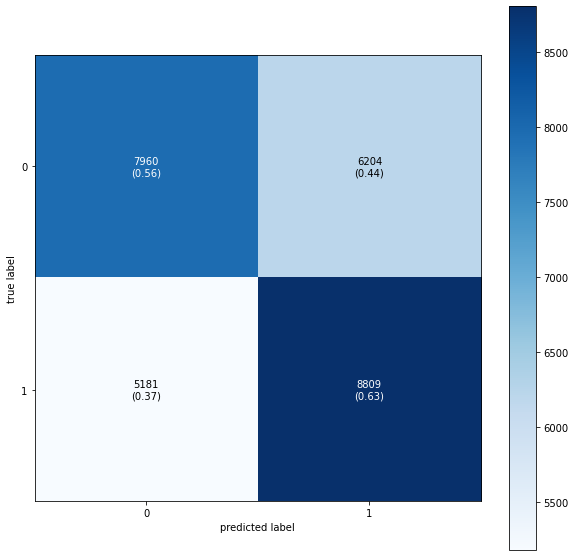

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.4.2 Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58     14164
         1.0       0.59      0.63      0.61     13990

    accuracy                           0.60     28154
   macro avg       0.60      0.60      0.60     28154
weighted avg       0.60      0.60      0.60     28154





### **5.4.3-ROC CURVE**

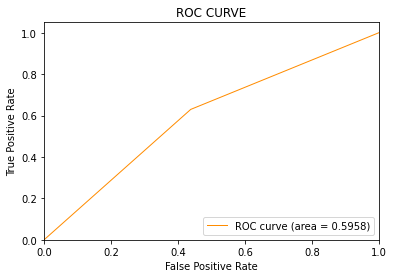

In [ ]:
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.5-KNN Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
KNN=GaussianNB()
KNN= KNN.fit(X_train , y_train)
KNN

GaussianNB()

In [ ]:
y_pred1 = KNN.predict(X_test)
kn=KNN.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN.score(X_test, y_test)))

Accuracy score= 0.5970


### **5.5.1-Confusion Matrix**



confusion matrix


[[7628 6536]
 [4809 9181]]




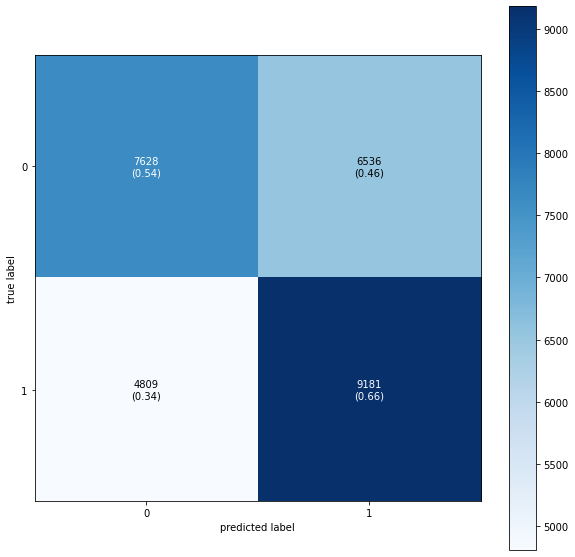

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.5.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.61      0.54      0.57     14164
         1.0       0.58      0.66      0.62     13990

    accuracy                           0.60     28154
   macro avg       0.60      0.60      0.60     28154
weighted avg       0.60      0.60      0.60     28154





### **5.5.3-ROC CURVE**

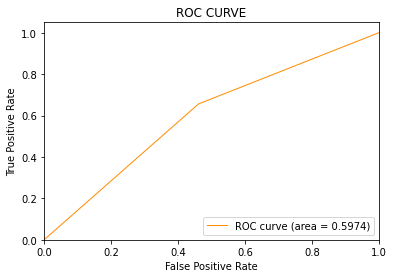

In [ ]:
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr5, tpr5)
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **6-Compare Modle performance** 

## **6.1-ROC Curve for Models**

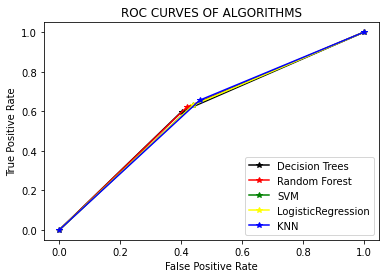

In [ ]:
plt.plot(fpr1, tpr1, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='SVM', color = 'green')
plt.plot(fpr4, tpr4, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr5, tpr5, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **6.2-Comparison of all algorithms Results**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv,4)])
x.add_row(["LogisticRegression Algorithm", round(lr,4)])
x.add_row(["KNN Algorithm", round(kn,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.5982  |
|     Random Forest Algorithm      |  0.601   |
| Support Vector Machine Algorithm |  0.5957  |
|   LogisticRegression Algorithm   |  0.5956  |
|          KNN Algorithm           |  0.597   |
+----------------------------------+----------+




In [ ]:
#  for sep data

x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv,4)])
x.add_row(["LogisticRegression Algorithm", round(lr,4)])
x.add_row(["KNN Algorithm", round(kn,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.6829  |
|     Random Forest Algorithm      |  0.6829  |
| Support Vector Machine Algorithm |  0.6827  |
|   LogisticRegression Algorithm   |  0.6826  |
|          KNN Algorithm           |  0.6829  |
+----------------------------------+----------+




## **6.3-Best Model with Accuracy and Time of execution**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Random Forest Algorithm", round(rn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------+----------+
|          Model          | Accuracy |
+-------------------------+----------+
| Random Forest Algorithm |  0.775   |
+-------------------------+----------+




#**13- Train on all training data now to make it more good on more data**

## **13.1 Logistic Regression**

In [ ]:
Ran_For= LogisticRegression()
Ran_For= Ran_For.fit(X , y)
Ran_For

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **13.1.1 Selecting the Test data of 8997 rows**

In [ ]:
Testdata=normalized_data_with_selected_features.tail(8997)

NameError: ignored

In [ ]:
Testdata

### **13.1.2 As we are going to Predict the 'Termination_Status' so we dont need this**

In [ ]:
Testdata=Testdata.drop(columns=['Termination_Status'])
Testdata

### **13.1.3 Getting Probabilties on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=Ran_For.predict_proba(Testdata)
predictions = np.amax(predictions, axis=1)
predictions

array([0.89484018, 0.99981501, 0.99123215, ..., 0.99817415, 0.99826815,
       0.99853741])

In [ ]:
Pred=pd.DataFrame()
Pred['Test data predictions probabilties']=predictions
Pred['Test data predictions probabilties']=round(Pred['Test data predictions probabilties'],2)
Pred['Test data predictions probabilties']

0       0.89
1       1.00
2       0.99
3       0.98
4       0.99
        ... 
8992    1.00
8993    1.00
8994    1.00
8995    1.00
8996    1.00
Name: Test data predictions probabilties, Length: 8997, dtype: float64

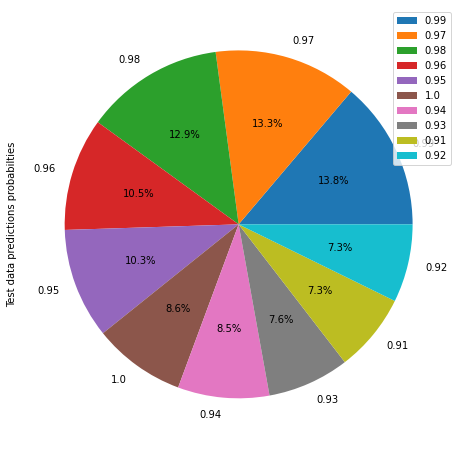

In [ ]:
Pred['Test data predictions probabilties'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [ ]:
Pred['Test data predictions probabilties'].value_counts()

0.99    835
0.97    805
0.98    780
0.96    635
0.95    620
1.00    519
0.94    514
0.93    460
0.91    441
0.92    439
0.90    411
0.89    332
0.88    326
0.87    274
0.86    256
0.85    209
0.84    169
0.83    158
0.82    121
0.81    106
0.80     85
0.79     67
0.78     58
0.77     44
0.76     43
0.75     25
0.69     23
0.74     22
0.73     22
0.66     19
0.70     18
0.71     16
0.72     16
0.59     14
0.67     13
0.58     10
0.51      9
0.54      9
0.62      9
0.65      9
0.55      8
0.61      7
0.52      7
0.63      7
0.68      6
0.64      5
0.60      5
0.57      4
0.56      3
0.50      3
0.53      1
Name: Test data predictions probabilties, dtype: int64

## **13.2-Getting Prediction on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=DTC.predict(Testdata)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
Pred['Test data predictions']=predictions
Pred['Test data predictions']=Pred['Test data predictions'].replace(0,'Yes')
Pred['Test data predictions']=Pred['Test data predictions'].replace(1,'No')
Pred

,Test data predictions probabilties,Test data predictions
0,0.89,No
1,1.00,No
2,0.99,No
3,0.98,No
4,0.99,No
...,...,...
8992,1.00,No
8993,1.00,No
8994,1.00,No
8995,1.00,No


# **14-Percentage of Predictions that are going to terminate is 1% and percentage of predictions that are not going to terminate are 99%**

In [ ]:
Pred['Test data predictions'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


NameError: ignored

In [ ]:
Pred['Test data predictions'].value_counts()

No     8907
Yes      90
Name: Test data predictions, dtype: int64

# **15-Saving the probabilties and predictions in the last column of test data as Predictions**

In [ ]:
Test_data['Test data predictions']=Pred['Test data predictions probabilties']
Test_data['Test data predictions']=Pred['Test data predictions']

In [ ]:
Test_data.to_csv('Headcount Test with Predictions probabilties Sep.csv')
print('Headcount Test with Predictions probabilties file saved')

Headcount Test with Predictions probabilties file saved


In [ ]:
!pip install h2o

     |████████████████████████████████| 164.8MB 85kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=a773884296b436e69e94d0da1d292cab53d0318ddb20961212b9af84a8f33520
  Stored in directory: /root/.cache/pip/wheels/4f/bb/82/0988682f9abd0b5e95109a4aae6793dd427173b6dc671d9252
Successfully built h2o


# **H2O Ranfom Forest**

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgqs7xpb5
  JVM stdout: /tmp/tmpgqs7xpb5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgqs7xpb5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,17 hours and 52 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_vgh9i9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
Train_data.columns

Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'CPT_ID', 'RESULT_VALUE', 'CPT_ID.1', 'RESULT_TEXT'],
      dtype='object')

In [ ]:
training_columns = ['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'CPT_ID', 'RESULT_VALUE', 'CPT_ID.1']
# Output parameter train against input parameters
response_column = 'RESULT_TEXT'

In [ ]:
import h2o
import pandas as pd

In [ ]:
hf = h2o.H2OFrame(Train_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train, test = hf.split_frame(ratios=[0.8])

In [ ]:
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

In [ ]:
model.train(x=training_columns, y=response_column, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
# Model performance
performance = model.model_performance(test_data=test)

print(performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.004735073406490919
RMSE: 0.0688118696628054
MAE: 0.010082532736872334
RMSLE: 0.047543521421204354
Mean Residual Deviance: 0.004735073406490919



#**References**

[Random Forest Classification with H2O](https://medium.com/tech-vision/random-forest-classification-with-h2o-python-for-beginners-b31f6e4ccf3c)

[Build and deploy your first machine learning web app](https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99)
